<a href="https://colab.research.google.com/github/sayan0506/DECA-implementation/blob/main/DECA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement DECA(Detailed Expression Capture and Animation)**

Notebook included pretrained model implementatio n from DECA git repository 

## GPU configuration check

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Sun Apr 18 09:27:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Check ffmpeg

In [ ]:
print(subprocess.getoutput('ffmpeg'))

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Clone Github DECA repo github 
Repo link: https://github.com/YadiraF/DECA

In [ ]:
# clone git repo
!git clone https://github.com/YadiraF/DECA

Cloning into 'DECA'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 170 (delta 46), reused 128 (delta 31), pack-reused 17
Receiving objects: 100% (170/170), 18.45 MiB | 39.36 MiB/s, done.
Resolving deltas: 100% (46/46), done.


## Install requirements

Create DECA directory

In [ ]:
%cd DECA

/content/DECA


**Install dependencies**

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 645kB 22.5MB/s 
     |████████████████████████████████| 748.8MB 24kB/s 
     |████████████████████████████████| 5.9MB 47.0MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-cp37-none-any.whl size=58291 sha256=db5326de9f640c2959f1a4026334a9811476b971647bd6bc5dd0b5c76a48591d
  Stored in directory: /root/.cache/pip/wheels/0a/73/91/b8dbef9746a907c8c008fc194a9691224ca3371b55f16f1dbd
  Created wheel for face-alignment: filename=face_alignment-1.3.3-py2.py3-none-any.whl size=27562 sha256=544295a0d6d3e7a696dd01a38c994514b293997cfe215348fe1f95734e90508e
  Stored in directory: /root/.cache/pip/wheels/76/1b/f7/7c61075544ea85a866ec89d1b455b123dad18c13361c02ff2b
Successfully built chumpy face-alignment
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninsta

**Adding the DECA path as pythonpath**

In [ ]:
!export PYTHONPATH=/content/DECA:$PYTHONPATH

Install pytorch3d

In [ ]:
!pip install pytorch3d

     |████████████████████████████████| 30.0MB 104kB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210415-cp37-none-any.whl size=59310 sha256=500d07ac39cd7ebbb083f135364ed18f9d4a94fe16ebc885c4b98761f685ae8e
  Stored in directory: /root/.cache/pip/wheels/a3/51/39/6bce45bcb56ba30ed7ea1386ddc22bb5853fa9887c080145e8
Successfully built fvcore


**Mount drive**

Mounting Drive folder where the models are stored.

Path: **'/content/drive/MyDrive/3D vision'**

In [17]:
import zipfile
import os
import shutil
from matplotlib import pyplot as plt

**Defining unzipping function**

In [ ]:
def unzip(zip_file, content_dir):
  if not os.path.isdir(content_dir):
    os.mkdir(content_dir)

  # unzipping
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(content_dir)


**Load Models**

1. Unzip Flame model
2. Load DECA trained model

* Copying unzipped Flame(2020) Model file (generic_model.pkl) to /.data folder
* Similarly copy zip trained DECA model weights to /.data folder in DECA directory

In [ ]:
# content directory
content_dir_2 = '/content/Flame_model_2020'

# zip
zip_file_2 = '/content/drive/MyDrive/3D vision/FLAME2020.zip' 

# unzipping FLAME2020 zip
unzip(zip_file_2, content_dir_2)

Copying generic_model.pkl to ./data

In [ ]:
shutil.copy('/content/Flame_model_2020/generic_model.pkl','/content/DECA/data')

'/content/DECA/data/generic_model.pkl'

Copying DECA model to ./data

In [ ]:
shutil.copy('/content/drive/MyDrive/3D vision/deca_model.tar','/content/DECA/data')

'/content/DECA/data/deca_model.tar'

## Reconstructing the Demo

1. 3D mesh reconstruction 
2. COarse shape
3. Detail shape 
4. Albedo map
5. Displays UV displacement map

Input path : /content/Input_img

Output path: /content/output_img

File structure:


In [15]:
# mention input image path
# output result path
# --saveKpt saves the 2D and 3D face landmarks 
!python demos/demo_reconstruct.py -i /content/Input_img -s /content/output_img --saveKpt True --saveDepth True --saveObj True --saveImages True

total 1 images
Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:04<00:00, 22.2MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4_1.6-c827573f02.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4_1.6-c827573f02.zip
100% 91.9M/91.9M [00:04<00:00, 21.4MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:02<00:00, 37.3MB/s]
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/DECA/data/template.mtl
  warnings.warn(f

## Output Visualization

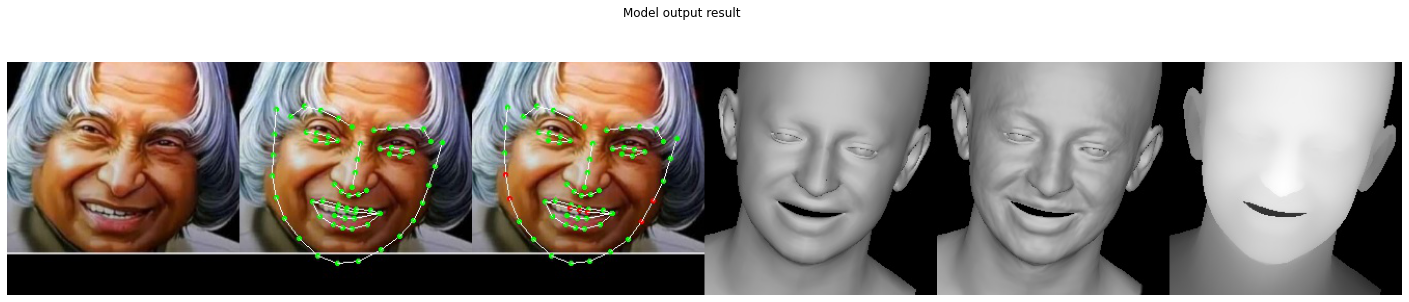

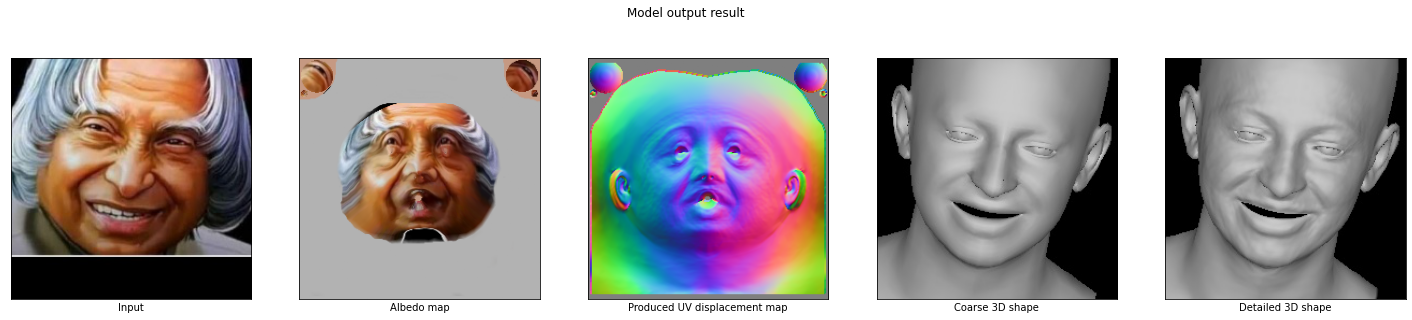

In [31]:
fig1 = plt.figure(figsize=(25,5))
fig1.suptitle('Model output result')
im_result = plt.imread('/content/output_img/missile_man_vis.jpg')
plt.imshow(im_result)
plt.axis('off')


fig2 = plt.figure(figsize=(25,5))
fig2.suptitle('Model output result')
im_albedo = plt.imread('/content/output_img/missile_man/missile_man.png')
im_input = plt.imread('/content/output_img/missile_man/missile_man_inputs.jpg')
im_uv = plt.imread('/content/output_img/missile_man/missile_man_normals.png')
im_coarse = plt.imread('/content/output_img/missile_man/missile_man_shape_images.jpg')
im_detail = plt.imread('/content/output_img/missile_man/missile_man_shape_detail_images.jpg')


fig2.add_subplot(1,5,1)
plt.imshow(im_input)
plt.xticks([])
plt.yticks([])
plt.xlabel('Input')

fig2.add_subplot(1,5,2)
plt.imshow(im_albedo)
plt.xticks([])
plt.yticks([])
plt.xlabel('Albedo map')

fig2.add_subplot(1,5,3)
plt.imshow(im_uv)
plt.xticks([])
plt.yticks([])
plt.xlabel('Produced UV displacement map')

fig2.add_subplot(1,5,4)
plt.imshow(im_coarse)
plt.xticks([])
plt.yticks([])
plt.xlabel('Coarse 3D shape')

fig2.add_subplot(1,5,5)
plt.imshow(im_detail)
plt.xticks([])
plt.yticks([])
plt.xlabel('Detailed 3D shape')

plt.show()

In [ ]:
!python demos/demo_teaser.py

total 3 images
total 9 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/DECA/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align

In [ ]:
!python demos/demo_teaser.py

total 3 images
total 9 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/DECA/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align